In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
fests_22 = pd.read_csv("./data/2022_festivals-assistents-order-name.csv")
fuente_1 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/c573360d-ed5d-4609-aaa5-55bb9e9175ca#additional-info"
fests_21 = pd.read_csv("./data/2021_festivals-assistents-order-name.csv")
fuente_2 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/57ed9976-8291-418d-a0fc-ecf572d8cb74?inner_span=True"
fests_20= pd.read_csv("./data/2020_festivals-assistents-order-name.csv")
fuente_3 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/1214655c-38e5-4434-a35c-ed3a6468cd23?inner_span=True"
fests_19 = pd.read_csv("./data/2019_festivals-assistents-order-name.csv")
fuente_4 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/077d738b-997f-46b9-ab96-500ab22f32b6?inner_span=True"
fests_18 = pd.read_csv("./data/2018_festivals-assistents-order-name.csv")
fuente_5 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/a5522295-70f1-4d0b-8cb2-8762cbcbf783?inner_span=True"

Funciones

In [393]:
def top_10_festivals(df):
    return df.nlargest(10, 'Assistents_a_Barcelona')[['NomDelFestival', 'Assistents_a_Barcelona']]

In [394]:
def crear_df_final(original_df, festival_list):
    return original_df[original_df['NomDelFestival'].isin(festival_list)]

In [395]:
def clasificar_titularidad(df, columna_entrada='Titularitat', columna_salida='Titularidad'):
    Titul = []
    for tit in df[columna_entrada]:
        if tit == "Ajuntament de Barcelona":
            Titul.append("Pública")
        elif tit == "Titularitat privada":
            Titul.append("Privada")
        elif tit == "Altres administracions públiques":
            Titul.append("Pública")
        elif tit == "Consorci o fundació amb presència administracions públiques":
            Titul.append("Mixta")
        else:
            Titul.append("Otro")
    
    df[columna_salida] = Titul
    df.drop(columns=columna_entrada, inplace=True)

    return df


In [396]:
def cuando_mes_estacion(df):
    df['DataInici'] = pd.to_datetime(df['DataInici'], format='%d/%m/%Y')
    df['Mes'] = df['DataInici'].dt.month_name(locale='es_ES').str.capitalize()

    def que_estacion(date):
        year = date.year
        if (date >= pd.Timestamp(year=year, month=12, day=21)) or (date < pd.Timestamp(year=year, month=3, day=21)):
            return 'Invierno'
        elif (date >= pd.Timestamp(year=year, month=3, day=21)) and (date < pd.Timestamp(year=year, month=6, day=21)):
            return 'Primavera'
        elif (date >= pd.Timestamp(year=year, month=6, day=21)) and (date < pd.Timestamp(year=year, month=9, day=21)):
            return 'Verano'
        else:
            return 'Otoño'
    
    df['Estacion'] = df['DataInici'].apply(que_estacion)
    df.drop('DataInici', axis=1, inplace=True)

    return df

In [397]:
def eliminar_festis(df):
    festis_out = [
        '48H Open House BCN', 'ARQUINSET', 'Barcelona Pensa', 'Biennal de pensament Ciutat Oberta',
        'DAU Barcelona', 'Festival IF Barcelona', 'Festival Sant Jordi de Nadal', 'Festival TRO',
        'Fixing the Future', 'FLIB. Festival de Literatura Italiana a Barcelona',
        'Flic. Festival de literatures i arts infantil i juvenil', 'Il·luLola. Festival d¿il·lustració infantil i juvenil',
        "Inrisus, Festival d'Humor de Barcelona", 'KMAmèrica. Festival de Literatura Llatinoamericana de Barcelona',
        "La setmana de l'àlbum", 'La Setmana de la Ciència', 'Liternatura. Festival de Literatura de Natura',
        'Més que Muses. Cicle de Dones Creadores', "Model. Festival d'Arquitectures de Barcelona",
        'Poblenou Open Day', 'Poblenou Open Night', 'Qlit. Festival de Literatura Queer', 'Séfer Festival del Libro Judío', 
        "Toon a Ville", "Transeuropa Festival", "Festival Internacional d'Arquitectura eme3", "Sant Jordi al Raval", "Primavera Vaca", 
        "Músics al Metro de Barcelona", "Como Pedro por mi casa", "Festival de la Ciència", "Som Cultura", "Festival Vèrtex BCN",
        "Palo Market Fest", "Llindars, Festival d'instal·lació i intervenci...", "Moviestar Liternatura", "Biennal de pensament Ciutat Oberta",
        "Biennal Ciutat i Ciència", "De Flor en Flor", "Festival del Llibre d'Artista i la Petita Edició", "GRAF. Còmic d'autor i edició independent",
        "Marrameu - Festival Jove de Nit d'Ànimes de la Guineueta", "MemeFest", "Novembre Vaca", "Smart City Week", 
        "Biennal de pensament Ciutat Oberta", "Barcelona Novel·la Històrica"
    ]
    
    filtro = ~df['NomDelFestival'].isin(festis_out)
    return df[filtro]

In [398]:
def eliminar_columnas(df):
    columnas_a_eliminar = ["DataFi", "Any", "Organitzador", "Notes_Dades", "Tipus", "Espai"]
    df.drop(columns=columnas_a_eliminar, inplace=True)
    return df

In [399]:
def reset_index(df):
    df_reset = df.reset_index(drop=True)
    df_reset.index += 1
    return df_reset

In [400]:
def total_asist(df):
    # Convertimos los valores de asistencia a float para asegurar la correcta suma
    df['Assistents_a_Barcelona'] = df['Assistents_a_Barcelona'].fillna(0).astype(float)
    df['Assistents_fora_de_Barcelona'] = df['Assistents_fora_de_Barcelona'].fillna(0).astype(float)

    # Sumamos los dos tipos de asistentes y aseguramos que el total tampoco tenga NaN
    df['total_asist'] = df['Assistents_a_Barcelona'] + df['Assistents_fora_de_Barcelona']
    df['total_asist'] = df['total_asist'].fillna(0).astype(float)  # Convertir a float para asegurar el tipo de dato

    return df

In [401]:
def procesar_festival(df_original):
    
    df = df_original.copy()
    
    df.drop(df[df['Tipus'] == 'Fires'].index, inplace=True)

    df = clasificar_titularidad(df)

    df = eliminar_columnas(df)

    df = eliminar_festis(df)

    df = cuando_mes_estacion(df)

    df = total_asist(df)

    return df

In [402]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [403]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [404]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [405]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [406]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [407]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

Limpieza y ajustes Fests_22

In [408]:
festivales_bcn_22 = procesar_festival(fests_22)

In [409]:
festivales_bcn_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 201
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambit                         167 non-null    object 
 1   Edicio                        156 non-null    float64
 2   NomDelFestival                167 non-null    object 
 3   Assistents_a_Barcelona        167 non-null    float64
 4   Assistents_fora_de_Barcelona  167 non-null    float64
 5   Titularidad                   167 non-null    object 
 6   Mes                           167 non-null    object 
 7   Estacion                      167 non-null    object 
 8   total_asist                   167 non-null    float64
dtypes: float64(4), object(5)
memory usage: 13.0+ KB


In [410]:
festivales_bcn_22.Ambit.unique()

array(['Música', 'Lletres', 'Arts escèniques', 'Audiovisuals',
       'Arts visuals', 'Multidisciplinaris i altres'], dtype=object)

Limpieza y ajustes Fests_21

In [411]:
festivales_bcn_21 = procesar_festival(fests_21)

In [412]:
festivales_bcn_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 202
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambit                         179 non-null    object 
 1   Edicio                        147 non-null    float64
 2   NomDelFestival                179 non-null    object 
 3   Assistents_a_Barcelona        179 non-null    float64
 4   Assistents_fora_de_Barcelona  179 non-null    float64
 5   Titularidad                   179 non-null    object 
 6   Mes                           179 non-null    object 
 7   Estacion                      179 non-null    object 
 8   total_asist                   179 non-null    float64
dtypes: float64(4), object(5)
memory usage: 14.0+ KB


In [413]:
festivales_bcn_21.Ambit.unique()

array(['Música', 'Lletres', 'Arts escèniques', 'Audiovisuals',
       'Arts visuals', 'Multidisciplinaris i altres'], dtype=object)

Limpieza y ajustes Fests_20

In [414]:
festivales_bcn_20 = procesar_festival(fests_20)

In [415]:
festivales_bcn_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 170
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambit                         148 non-null    object 
 1   Edicio                        148 non-null    float64
 2   NomDelFestival                148 non-null    object 
 3   Assistents_a_Barcelona        148 non-null    float64
 4   Assistents_fora_de_Barcelona  148 non-null    float64
 5   Titularidad                   148 non-null    object 
 6   Mes                           148 non-null    object 
 7   Estacion                      148 non-null    object 
 8   total_asist                   148 non-null    float64
dtypes: float64(4), object(5)
memory usage: 11.6+ KB


Limpieza y ajustes Fests_19

In [416]:
festivales_bcn_19 = procesar_festival(fests_19)

In [417]:
festivales_bcn_19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 240
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambit                         211 non-null    object 
 1   Edicio                        200 non-null    float64
 2   NomDelFestival                211 non-null    object 
 3   Assistents_a_Barcelona        211 non-null    float64
 4   Assistents_fora_de_Barcelona  211 non-null    float64
 5   Titularidad                   211 non-null    object 
 6   Mes                           211 non-null    object 
 7   Estacion                      211 non-null    object 
 8   total_asist                   211 non-null    float64
dtypes: float64(4), object(5)
memory usage: 16.5+ KB


Limpieza y ajustes Fests_18

In [418]:
festivales_bcn_18 = procesar_festival(fests_18)

In [419]:
festivales_bcn_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 210
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambit                         182 non-null    object 
 1   Edicio                        180 non-null    float64
 2   NomDelFestival                182 non-null    object 
 3   Assistents_a_Barcelona        182 non-null    float64
 4   Assistents_fora_de_Barcelona  182 non-null    float64
 5   Titularidad                   182 non-null    object 
 6   Mes                           182 non-null    object 
 7   Estacion                      182 non-null    object 
 8   total_asist                   182 non-null    float64
dtypes: float64(4), object(5)
memory usage: 14.2+ KB


Seleccion de los más relevantes según número de asistentes y que hayan estado presentes en la mayoría de los años

In [420]:
top_festis_22 = top_10_festivals(festivales_bcn_22)
top_festis_21 = top_10_festivals(festivales_bcn_21)
top_festis_20 = top_10_festivals(festivales_bcn_20)
top_festis_19 = top_10_festivals(festivales_bcn_19)
top_festis_18 = top_10_festivals(festivales_bcn_18)

In [421]:
fests_mas_top = pd.concat([top_festis_22, top_festis_21, top_festis_20, top_festis_19, top_festis_18])
festis_repes = fests_mas_top['NomDelFestival'].value_counts()[lambda x: x >= 3].index.tolist()

In [422]:
festivales_bcn_22 = reset_index(crear_df_final(festivales_bcn_22, festis_repes))
festivales_bcn_21 = reset_index(crear_df_final(festivales_bcn_21, festis_repes))
festivales_bcn_20 = reset_index(crear_df_final(festivales_bcn_21, festis_repes))
festivales_bcn_19 = reset_index(crear_df_final(festivales_bcn_19, festis_repes))
festivales_bcn_18 = reset_index(crear_df_final(festivales_bcn_18, festis_repes))

Correcciones puntuales

In [488]:
festivales_bcn_22.loc[festivales_bcn_22['NomDelFestival'] == 'Brunch-in the City', 'Ambit'] = 'Musica'
festivales_bcn_21.loc[festivales_bcn_21['NomDelFestival'] == 'Brunch-in the City', 'Ambit'] = 'Musica'
festivales_bcn_20.loc[festivales_bcn_20['NomDelFestival'] == 'Brunch-in the City', 'Ambit'] = 'Musica'
festivales_bcn_19.loc[festivales_bcn_19['NomDelFestival'] == 'Brunch-in the City', 'Ambit'] = 'Musica'
festivales_bcn_18.loc[festivales_bcn_18['NomDelFestival'] == 'Brunch-in the City', 'Ambit'] = 'Musica'

In [504]:
festivales_bcn_22["Titularidad"] = festivales_bcn_22['Titularidad'] == 'Pública'
festivales_bcn_22.rename(columns={'Titularidad': 'Pública?'}, inplace=True)
festivales_bcn_21["Titularidad"] = festivales_bcn_21['Titularidad'] == 'Pública'
festivales_bcn_21.rename(columns={'Titularidad': 'Pública?'}, inplace=True)
festivales_bcn_20["Titularidad"] = festivales_bcn_20['Titularidad'] == 'Pública'
festivales_bcn_20.rename(columns={'Titularidad': 'Pública?'}, inplace=True)
festivales_bcn_19["Titularidad"] = festivales_bcn_19['Titularidad'] == 'Pública'
festivales_bcn_19.rename(columns={'Titularidad': 'Pública?'}, inplace=True)
festivales_bcn_18["Titularidad"] = festivales_bcn_18['Titularidad'] == 'Pública'
festivales_bcn_18.rename(columns={'Titularidad': 'Pública?'}, inplace=True)

In [505]:
festivales_bcn_18

,Ambit,Edicio,NomDelFestival,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,Pública?,Mes,Estacion,total_asist
1,Musica,7.0,Brunch-in the City,135000.0,0.0,False,Marzo,Invierno,135000.0
2,Música,6.0,Festival Jardins de Pedralbes,59800.0,0.0,False,Junio,Primavera,59800.0
3,Multidisciplinaris i altres,42.0,Grec Festival de Barcelona,109868.0,0.0,True,Julio,Verano,109868.0
4,Multidisciplinaris i altres,7.0,Llum BCN,170000.0,0.0,True,Febrero,Invierno,170000.0
5,Arts escèniques,9.0,Mercè Arts de Carrer. MAC,290522.0,0.0,True,Septiembre,Otoño,290522.0
6,Música,18.0,Primavera Sound,220000.0,0.0,False,Mayo,Primavera,220000.0
7,Música,25.0,Sónar. Festival Internacional de Música Avança...,126586.0,0.0,False,Junio,Primavera,126586.0
8,Música,50.0,Voll-Damm Festival de Jazz de Barcelona,144000.0,0.0,False,Abril,Primavera,144000.0


Ahora, los DataFrames modificados y preparados para procesar, y una descripción de los mismos:

**Dataset:**  festivales_bcn_[año] <br>
**Descripción:**  Se trata de datasets obtenidos de los datos abiertos del Ayuntamiento de Barcelona con el registro de festivales culturales en la ciudad <br>
**Periodo:**  Cada dataset corresponde a un año diferente <br>

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1, sin nombre|Es el índice de cada dataframe, comenzando en 1...|--|--|sólo índice||
|Ambit|Ámbito artístico al que pertenece cada festival|Categórica nominal|0|Cardinalidad: 3||
|Edició|Número de ediciones de ese festival|Numérica discreta|2|número de la edición del año correspondiente||
|NomDelFestival|Nombre del festival|Categórica nominal|3|||
|Assistents_a_Barcelona|Número de asistentes de Barcelona|Numérica continua|0|Dato no siempre disponible||
|Assistents_fora_de_Barcelona|Número de asistentes de fuera de Barcelona|Numérica continua|0|Dato pocas veces disponible||
|Pública?|Entidad responsable de la organización del festival|Bool|1|Resultado de la transformación de la columna original "Titularitat", donde True es titularidad pública y False es privada||
|Mes|El mes al que corresponde el dataset|Categórica nominal|2|Datos a partir de la transformación de la columna DataInici, luego eliminada||
|Estacion|La estación al que corresponde el dataset|Categórica nominal|1|Datos a partir de la transformación de la columna DataInici, luego eliminada||


In [424]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "Mes",
    "Estacion"
]


In [425]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion'
]

In [426]:
columnas_numericas_fests = [
    "Edicio",
    "Assistents_a_Barcelona",
    "Assistents_fora_de_Barcelona",
    "total_asist"
]

Análisis univariante

Festivales 2022

Tendencia central

In [427]:
festivales_bcn_22.describe().loc["mean"]

Edicio                              21.666667
Assistents_a_Barcelona          182392.000000
Assistents_fora_de_Barcelona     16666.666667
total_asist                     199058.666667
Name: mean, dtype: float64

In [428]:
festivales_bcn_22.describe().loc["50%"]

Edicio                              13.0
Assistents_a_Barcelona          122000.0
Assistents_fora_de_Barcelona         0.0
total_asist                     122000.0
Name: 50%, dtype: float64

In [429]:
festivales_bcn_22.describe().loc["max"]

Edicio                              54.0
Assistents_a_Barcelona          460500.0
Assistents_fora_de_Barcelona    150000.0
total_asist                     460500.0
Name: max, dtype: float64

In [430]:
festivales_bcn_22.describe().loc["min"]

Edicio                              3.0
Assistents_a_Barcelona          80000.0
Assistents_fora_de_Barcelona        0.0
total_asist                     80000.0
Name: min, dtype: float64

In [431]:
festivales_bcn_22[categoricas_festivales].mode().T

,0,1
Ambit,Multidisciplinaris i altres,Música
Titularidad,Privada,NaN
Mes,Junio,NaN
Estacion,Otoño,NaN


La mediana, situada en 13, parece ser más representativa a la hora de ver la cantidad de ediciones que llevan a cuestas los festivales más representativos que han tenido lugar en los últimos 5 años en Barcelona, ya que hay valores bastante alejados de la media, como uno de ellos que lleva 54 ediciones a cuestas, lo que resulta en una media algo distorcionada. <br>
Lo mismo sucede con la cantidad de asistentes, ya que hay casos que van desde los 8mil hasta el casi medio millón, pero el valor más representativo está en torno a los 120 mil.

Frecuencias relativa y absoluta

In [432]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts())
    print("\n")

Ambit
Multidisciplinaris i altres    4
Música                         4
Arts escèniques                1
Name: count, dtype: int64


Titularidad
Privada    5
Pública    4
Name: count, dtype: int64


Mes
Junio         3
Diciembre     1
Marzo         1
Febrero       1
Septiembre    1
Julio         1
Octubre       1
Name: count, dtype: int64


Estacion
Otoño        3
Invierno     2
Primavera    2
Verano       2
Name: count, dtype: int64




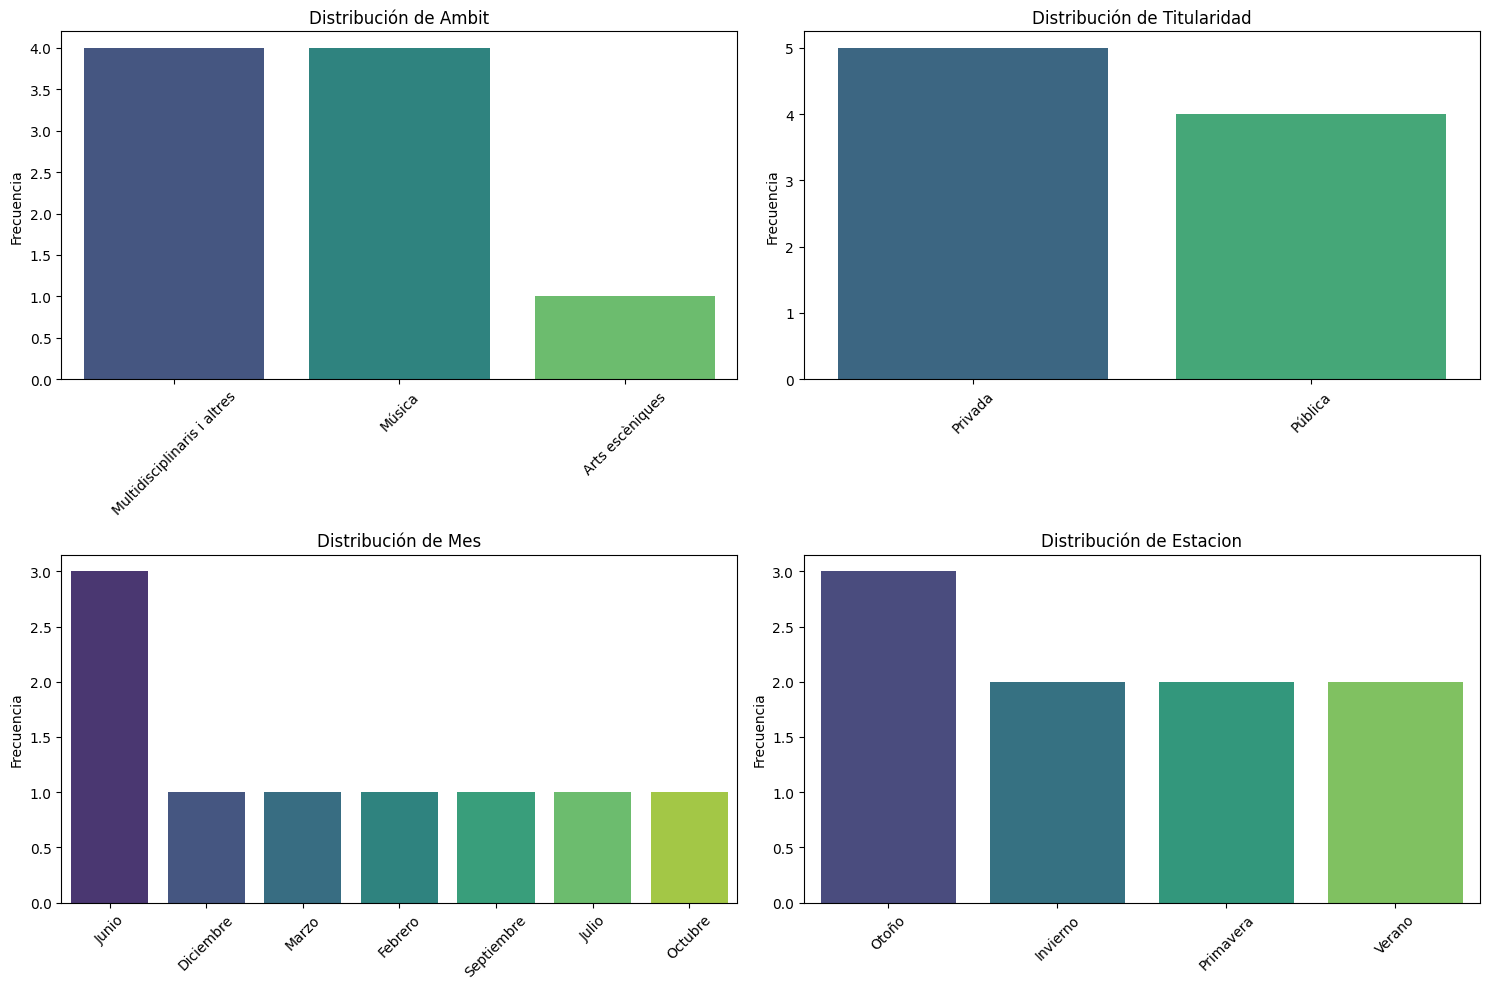

In [433]:
pinta_distribucion_categoricas(festivales_bcn_22, categoricas_destacadas)

Junio parece ser el mes que concentra mayor cantidad de grandes festivales ya establecidos, si bien, a pesar de ello y si miramos según estaciones, es en otoño cuando mñas propuestas de este tipo hay. Cabe destacar, igualmente, que fuera de estos picos hay una distribucion equitativa enntre las otras temporadas. <br>
También es relevante observar que escénicas tiene menos representación en total, frente a las porpuestas musicales o multidisciplinares (que en ciertos casos incluyen tanto música como escénicas). <br>
Y que hay una predominancia de las poropuestas de titularidad pública, aunque seguidas muy de cerca de las privadas.


In [476]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts()/len(festivales_bcn_22)*100)
    print("\n")

Ambit
Multidisciplinaris i altres    44.444444
Música                         44.444444
Arts escèniques                11.111111
Name: count, dtype: float64


Titularidad
Privada    55.555556
Pública    44.444444
Name: count, dtype: float64


Mes
Junio         33.333333
Diciembre     11.111111
Marzo         11.111111
Febrero       11.111111
Septiembre    11.111111
Julio         11.111111
Octubre       11.111111
Name: count, dtype: float64


Estacion
Otoño        33.333333
Invierno     22.222222
Primavera    22.222222
Verano       22.222222
Name: count, dtype: float64




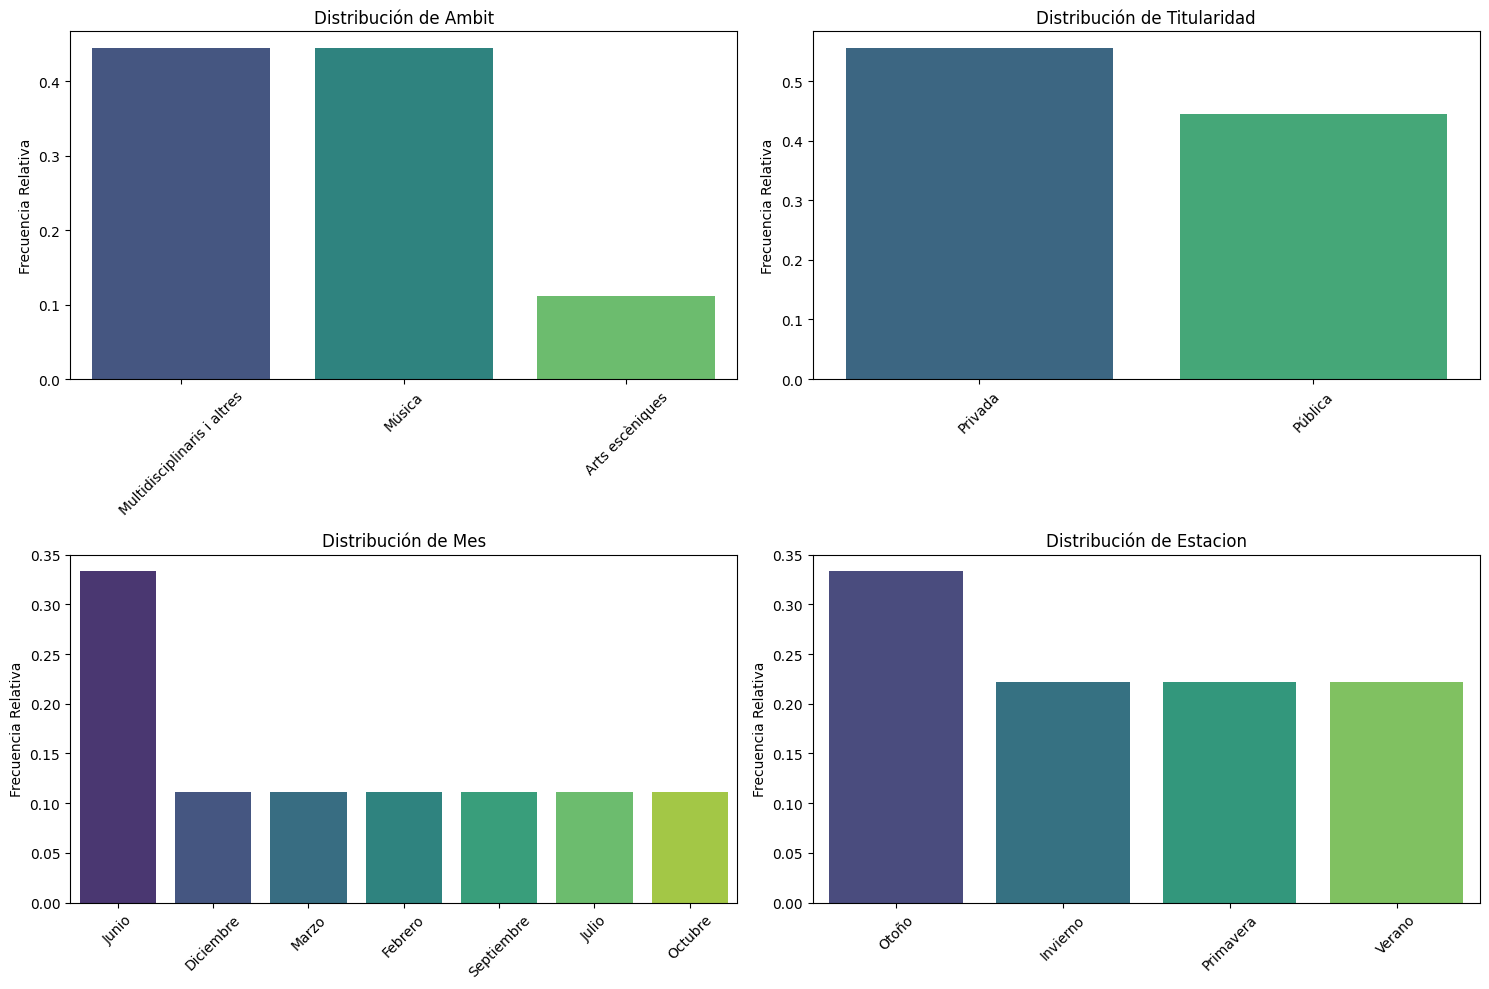

In [435]:
pinta_distribucion_categoricas(festivales_bcn_22, categoricas_destacadas, relativa = True)

Si en lugar de atender a las frecuencias absolutas miramos las relativas, las conclusiones son las mismas.

Medidas de posición

In [436]:
festivales_bcn_22.describe()

,Edicio,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,total_asist
count,9.000000,9.000000,9.000000,9.000000
mean,21.666667,182392.000000,16666.666667,199058.666667
std,17.776389,125596.050134,50000.000000,137603.298686
min,3.000000,80000.000000,0.000000,80000.000000
25%,10.000000,100000.000000,0.000000,100000.000000
50%,13.000000,122000.000000,0.000000,122000.000000
75%,29.000000,200000.000000,0.000000,300000.000000
max,54.000000,460500.000000,150000.000000,460500.000000


In [437]:
get_IQR(festivales_bcn_22,"Edicio") 

19.0

In [438]:
print(festivales_bcn_22["Edicio"].quantile(0.5), "\n",
    festivales_bcn_22["Edicio"].quantile(0.9), "\n",
    festivales_bcn_22["Edicio"].quantile(0.95), "\n",
    festivales_bcn_22["Edicio"].max())

13.0 
 47.6 
 50.8 
 54.0


Es notable la dispersión de valores cuando miramos el rango intercuartílico en lo referente al número de ediciones, ya que la mediana está en las 13 ediciones, el 90% está por debajo de las 48, y el último 10% concentra picos de más de 50.

In [439]:
get_IQR(festivales_bcn_22,"total_asist") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

200000.0

In [440]:
total_asist
print(festivales_bcn_22["total_asist"].quantile(0.5), "\n",
    festivales_bcn_22["total_asist"].quantile(0.9), "\n",
    festivales_bcn_22["total_asist"].quantile(0.95), "\n",
    festivales_bcn_22["total_asist"].max())

122000.0 
 372100.0 
 416299.99999999994 
 460500.0


Mucho más agudo aún es el pico de número de asistentes, en el que la mediana está en 122.000, el primero 90% en 370mil, que ya es 3 veces más, pero el último segmento pega un salto abrupto superando los 450 mil.

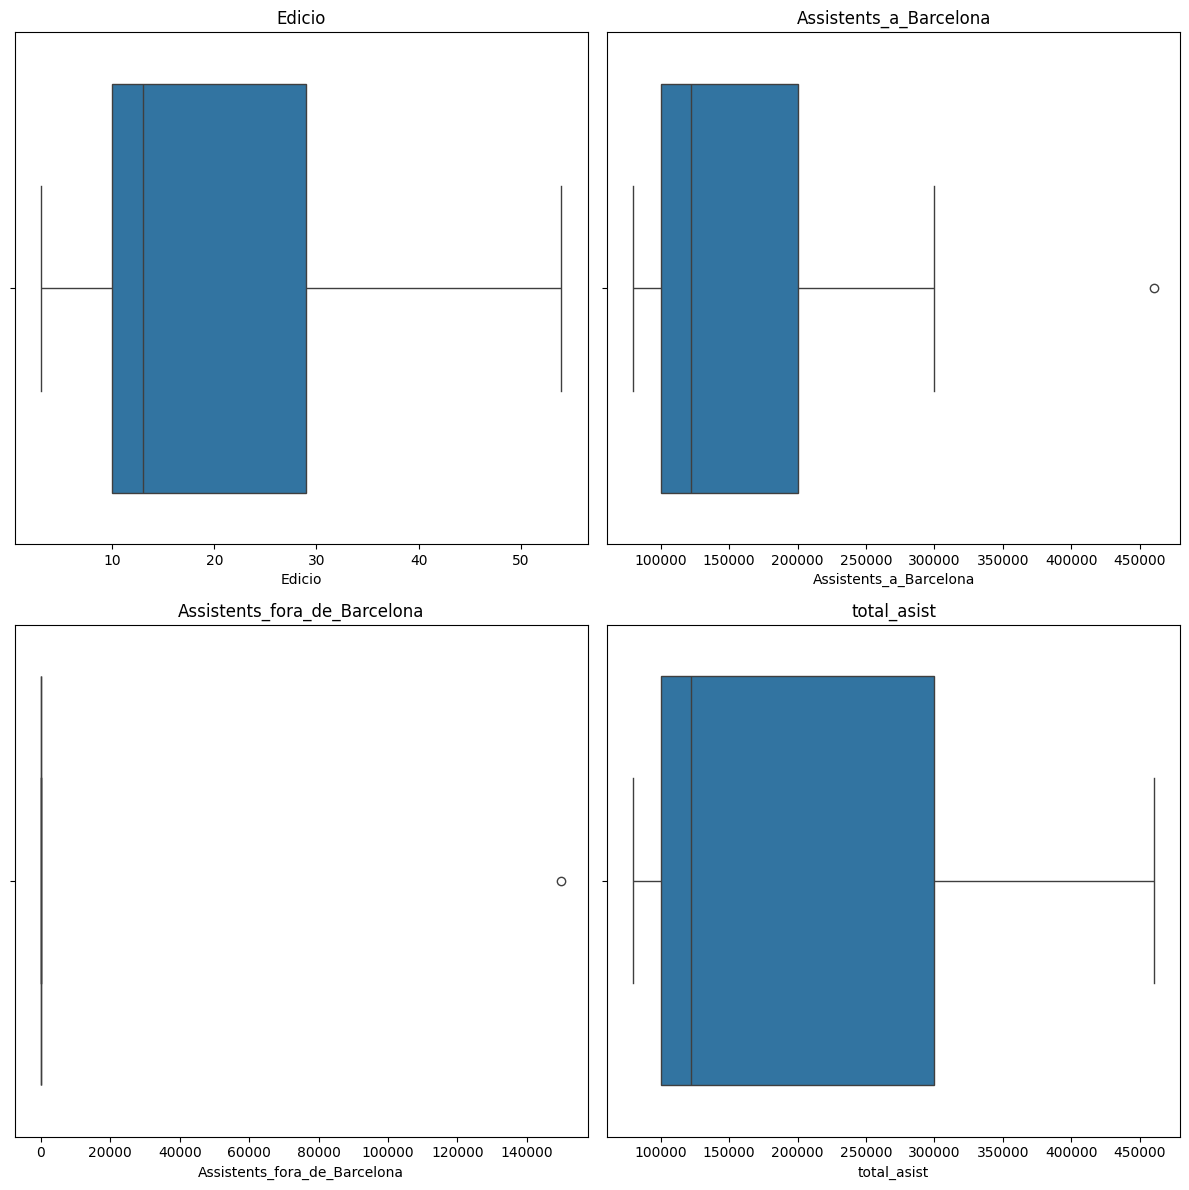

In [441]:
plot_multiple_boxplots(festivales_bcn_22, columnas_numericas_fests)

Gracias a los boxplots podemos observar como no hay una media centrada, ni en ediciones ni en asistentes, aunque la mayoría de los casos está dentro del rango. Y se ve claramente un outlier, que em el caso de los asistentes, que es el que tiene el casi medio millón de asistentes.

In [442]:
plot_boxplot_grouped(festivales_bcn_22, "Edicio", "total_asist")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [443]:
festivales_bcn_22.describe().loc[["std", "mean"]].T

,std,mean
Edicio,17.776389,21.666667
Assistents_a_Barcelona,125596.050134,182392.000000
Assistents_fora_de_Barcelona,50000.000000,16666.666667
total_asist,137603.298686,199058.666667


In [444]:
variabilidad(festivales_bcn_22)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,17.776389,21.666667,0.820449
Assistents_a_Barcelona,125596.050134,182392.000000,0.688605
Assistents_fora_de_Barcelona,50000.000000,16666.666667,3.000000
total_asist,137603.298686,199058.666667,0.691270


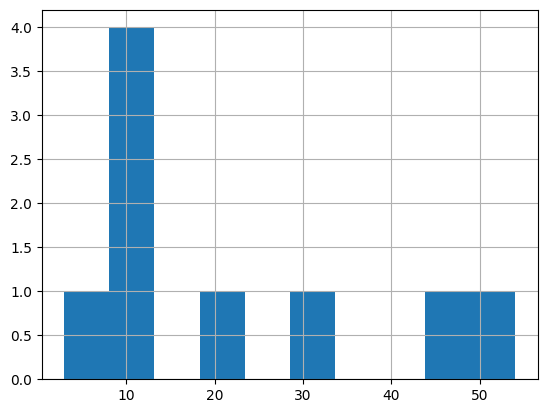

In [445]:
festivales_bcn_22["Edicio"].hist();

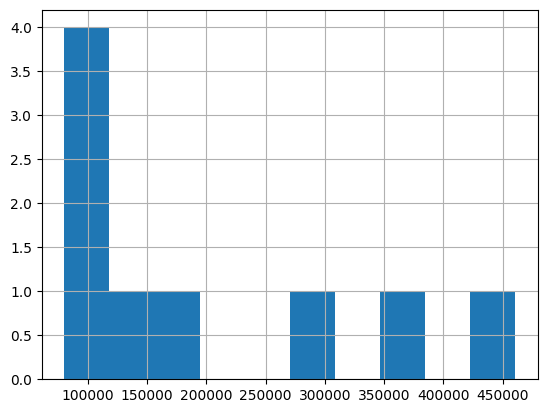

In [446]:
festivales_bcn_22["total_asist"].hist();

Hay bastabte dispersión de valores, tanto de asistentes como de número de ediciones.

Festivales 2021

Tendencia central

In [447]:
festivales_bcn_21.describe().loc["mean"]

Edicio                             19.285714
Assistents_a_Barcelona          75648.000000
Assistents_fora_de_Barcelona        0.000000
total_asist                     75648.000000
Name: mean, dtype: float64

In [448]:
festivales_bcn_21.describe().loc["50%"]

Edicio                             10.0
Assistents_a_Barcelona          52568.0
Assistents_fora_de_Barcelona        0.0
total_asist                     52568.0
Name: 50%, dtype: float64

In [449]:
festivales_bcn_21.describe().loc["max"]

Edicio                              53.0
Assistents_a_Barcelona          221000.0
Assistents_fora_de_Barcelona         0.0
total_asist                     221000.0
Name: max, dtype: float64

In [450]:
festivales_bcn_21.describe().loc["min"]

Edicio                          2.0
Assistents_a_Barcelona          0.0
Assistents_fora_de_Barcelona    0.0
total_asist                     0.0
Name: min, dtype: float64

In [451]:
festivales_bcn_21[categoricas_festivales].mode().T

,0,1
Ambit,Multidisciplinaris i altres,NaN
Titularidad,Pública,NaN
Mes,Junio,Noviembre
Estacion,Otoño,NaN


Para los festivales de 2021 las conclusiones son similares a las de 2022 en lo que hace a asistentes y número de ediciones, y a la mejor representación por la mediana que por la media al haber valores extremos dispares

Frecuencia

In [452]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts())
    print("\n")

Ambit
Multidisciplinaris i altres    4
Música                         2
Arts escèniques                1
Name: count, dtype: int64


Titularidad
Pública    4
Privada    3
Name: count, dtype: int64


Mes
Noviembre     2
Junio         2
Diciembre     1
Septiembre    1
Enero         1
Name: count, dtype: int64


Estacion
Otoño        4
Primavera    1
Verano       1
Invierno     1
Name: count, dtype: int64




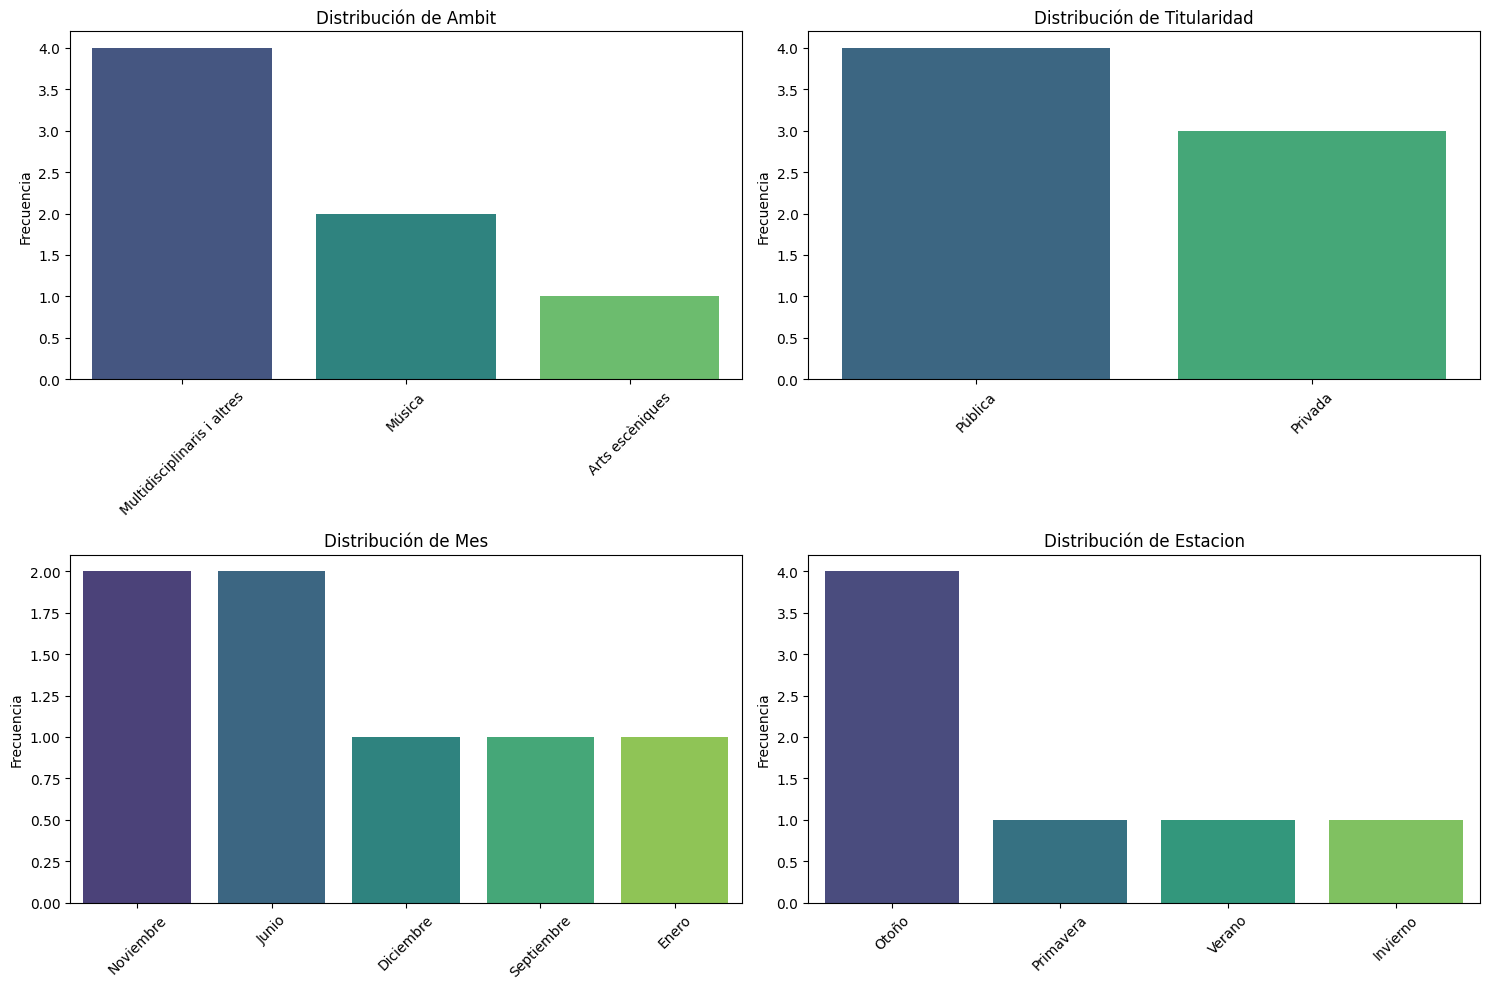

In [453]:
pinta_distribucion_categoricas(festivales_bcn_21, categoricas_destacadas)

A diferencia de 2022, cabe señalar que en 2021 la proporción de festivales musicales respecto al total es bastante más baja, y se ve mñas escalonada la diferencia entre los multidisiplinares, en primer lugar, y escénicas, en último lugar. <br>
Se invierte además, en este caso, la proporción de eventos de titularidad pública y privada a favir de la pública. <br>
En cuanto al la distribución de los eventos a los largo del año, sigue estando junio en primera posición, aunque empatado con noviembre, y otoño aumenta su preeminencia respecto a las demás estaciones. Vale la pena destacar que 2 de las propuestas culturales más destacadas en materia de festivales, MAC y BAM, son justamente las que tienen lugar para las fiestas de la Mercé, que es al inicio del otoño yde titularidad pública.

Festivales 2020

Tendencia central

In [454]:
festivales_bcn_20.describe().loc["mean"]

Edicio                             19.285714
Assistents_a_Barcelona          75648.000000
Assistents_fora_de_Barcelona        0.000000
total_asist                     75648.000000
Name: mean, dtype: float64

In [455]:
festivales_bcn_20.describe().loc["50%"]

Edicio                             10.0
Assistents_a_Barcelona          52568.0
Assistents_fora_de_Barcelona        0.0
total_asist                     52568.0
Name: 50%, dtype: float64

In [456]:
festivales_bcn_20.describe().loc["max"]

Edicio                              53.0
Assistents_a_Barcelona          221000.0
Assistents_fora_de_Barcelona         0.0
total_asist                     221000.0
Name: max, dtype: float64

In [457]:
festivales_bcn_20.describe().loc["min"]

Edicio                          2.0
Assistents_a_Barcelona          0.0
Assistents_fora_de_Barcelona    0.0
total_asist                     0.0
Name: min, dtype: float64

Siendo este el año de la pandemia, con valores de asistentes mucho más bajos que los registrados otros años, con máximos no tan extremos, se aprecia en este caso una mayor paridad entre la media (75 mil) y la mediana (52 mil)en cuanto al número de asistentes.

In [458]:
festivales_bcn_20[categoricas_festivales].mode().T

,0,1
Ambit,Multidisciplinaris i altres,NaN
Titularidad,Pública,NaN
Mes,Junio,Noviembre
Estacion,Otoño,NaN


Frecuencia

In [459]:
for catego in categoricas_destacadas:
    print(festivales_bcn_20[catego].value_counts())
    print("\n")

Ambit
Multidisciplinaris i altres    4
Música                         2
Arts escèniques                1
Name: count, dtype: int64


Titularidad
Pública    4
Privada    3
Name: count, dtype: int64


Mes
Noviembre     2
Junio         2
Diciembre     1
Septiembre    1
Enero         1
Name: count, dtype: int64


Estacion
Otoño        4
Primavera    1
Verano       1
Invierno     1
Name: count, dtype: int64




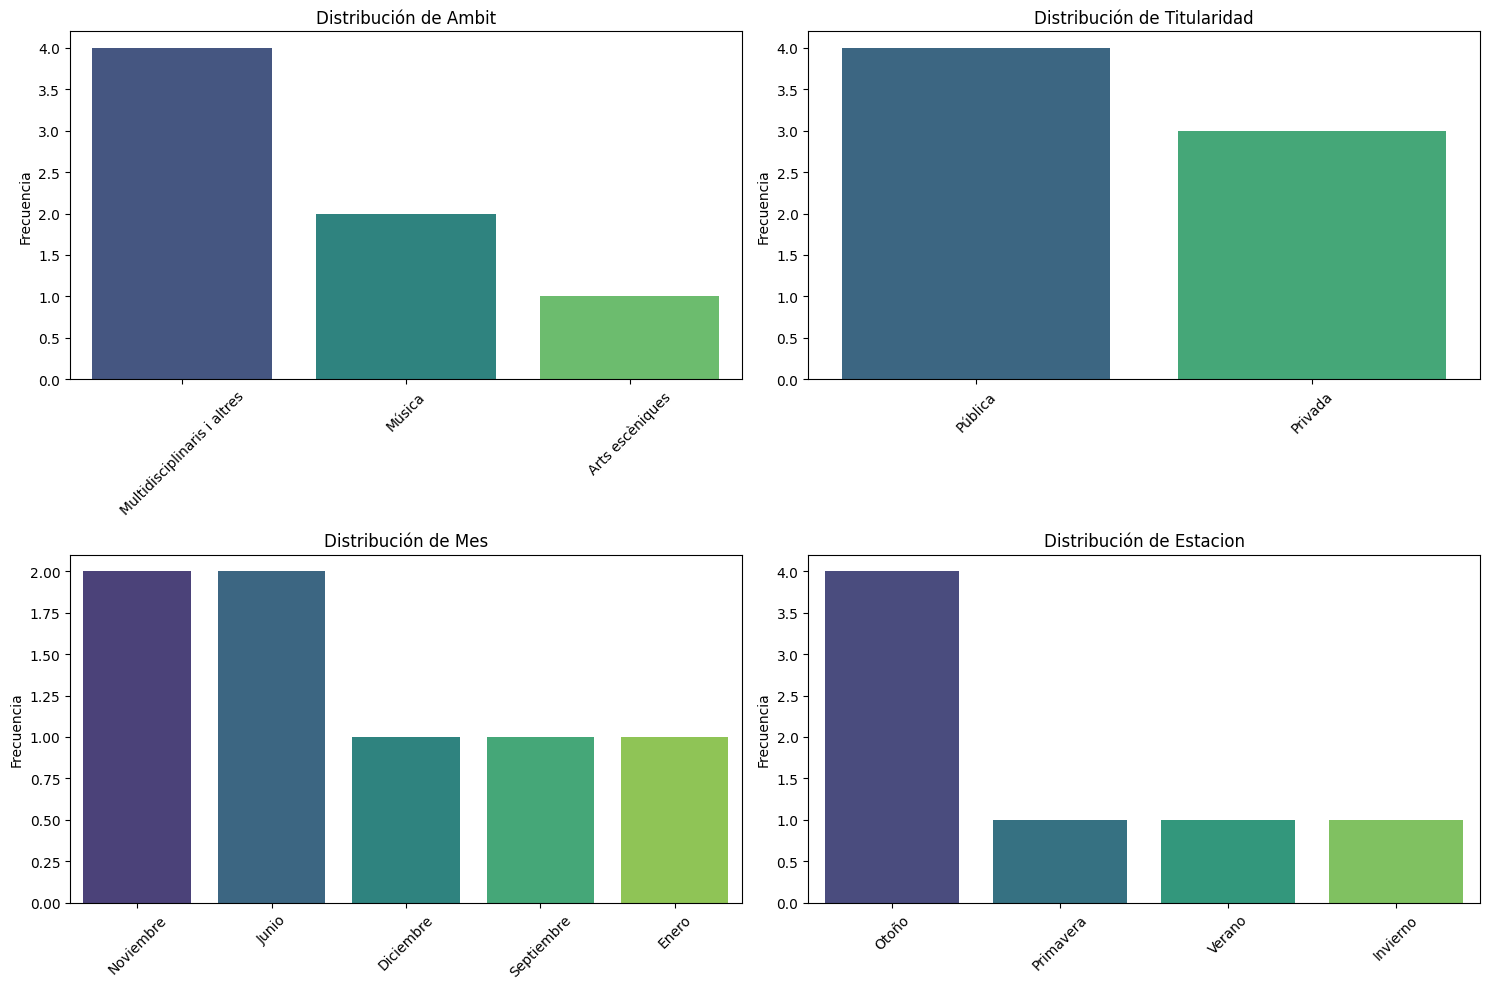

In [460]:
pinta_distribucion_categoricas(festivales_bcn_20, categoricas_destacadas)

Mismas conclusiones que con los valores absolutos

Festivales 2019

Tendencia central

In [461]:
festivales_bcn_19.describe().loc["mean"]

Edicio                              21.500
Assistents_a_Barcelona          141292.875
Assistents_fora_de_Barcelona         0.000
total_asist                     141292.875
Name: mean, dtype: float64

In [462]:
festivales_bcn_19.describe().loc["50%"]

Edicio                              14.5
Assistents_a_Barcelona          135320.0
Assistents_fora_de_Barcelona         0.0
total_asist                     135320.0
Name: 50%, dtype: float64

In [463]:
festivales_bcn_19.describe().loc["max"]

Edicio                              51.0
Assistents_a_Barcelona          273262.0
Assistents_fora_de_Barcelona         0.0
total_asist                     273262.0
Name: max, dtype: float64

Para el 19 tampoco se aprecia una diferencia tan abismal entre la media (141 mil) y la mediana (135 mil) de asistentes totales, apenas 6 mil pax de diferencia

In [464]:
festivales_bcn_19.describe().loc["min"]

Edicio                          7.0
Assistents_a_Barcelona          0.0
Assistents_fora_de_Barcelona    0.0
total_asist                     0.0
Name: min, dtype: float64

In [465]:
festivales_bcn_19[categoricas_festivales].mode().T

,0,1
Ambit,Música,NaN
Titularidad,Privada,NaN
Mes,Junio,Septiembre
Estacion,Verano,NaN


Frecuencia

In [466]:
for catego in categoricas_destacadas:
    print(festivales_bcn_19[catego].value_counts())
    print("\n")

Ambit
Música                         4
Multidisciplinaris i altres    3
Arts escèniques                1
Name: count, dtype: int64


Titularidad
Privada    5
Pública    3
Name: count, dtype: int64


Mes
Junio         2
Septiembre    2
Marzo         1
Febrero       1
Mayo          1
Julio         1
Name: count, dtype: int64


Estacion
Verano       3
Invierno     2
Primavera    2
Otoño        1
Name: count, dtype: int64




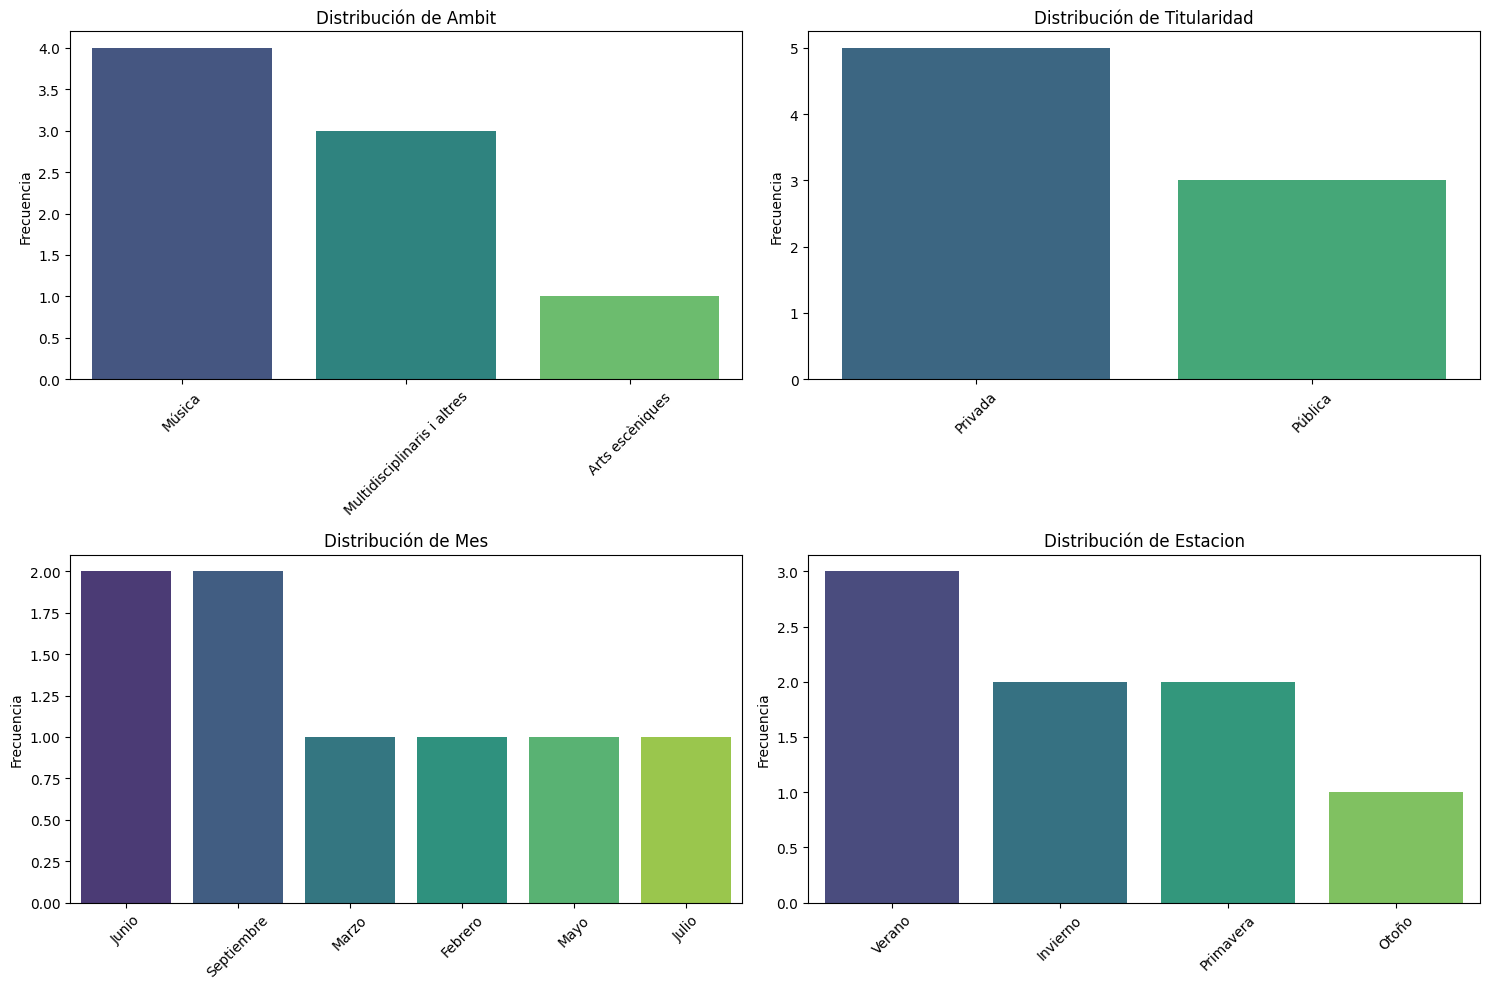

In [467]:
pinta_distribucion_categoricas(festivales_bcn_19, categoricas_destacadas)

En el año justo anterior a la pandemia se ve una clara predominancia de los festivales de música, igual que en el 2022, año de la recuperación. <br>
También se ven mayoría de eventos de titularidad privada, que son los que caen en picado el año de la pandemia y el inmediatamente posterior, cuando el sector público se hace cargo de la promoción de eventos culturales, entendièndose que asumiento la inversión por cuestión de políticas culturales cuando el riesgso económico no es viable para el sector privado.<br>
También es importante destacar que en este año la distribución de los eventos a lo largo del año es muy diferente a lo que vemos en años posteriores, y la mayoría de eventos se aglutinan justo antes y después de los meses de calor (en junio y en septiembre), lo que resulta en un pico marcado en el verano, mientras que el otoño resulta la temporada con menor número de propuestas culturales de gran envergadura.<br>

Festivales 2018

Tendencia central

In [468]:
festivales_bcn_18.describe().loc["mean"]

Edicio                              20.5
Assistents_a_Barcelona          156972.0
Assistents_fora_de_Barcelona         0.0
total_asist                     156972.0
Name: mean, dtype: float64

In [469]:
festivales_bcn_18.describe().loc["50%"]

Edicio                              13.5
Assistents_a_Barcelona          139500.0
Assistents_fora_de_Barcelona         0.0
total_asist                     139500.0
Name: 50%, dtype: float64

In [470]:
festivales_bcn_18.describe().loc["max"]

Edicio                              50.0
Assistents_a_Barcelona          290522.0
Assistents_fora_de_Barcelona         0.0
total_asist                     290522.0
Name: max, dtype: float64

In [471]:
festivales_bcn_18.describe().loc["min"]

Edicio                              6.0
Assistents_a_Barcelona          59800.0
Assistents_fora_de_Barcelona        0.0
total_asist                     59800.0
Name: min, dtype: float64

Curiosamente es en 2018 cuando menos diferencia hay entre media y mediana en número de ediciones. Habrá que ver si es que alguno con muchas ediciones cayó en 2019 y eso ha hecho que luego se disparen las diferencias, o tal vez hayan surgido varios nuevos que bajaran mucho la media... <br>
Como en otros años, la mediana de número de asistentes es más representativa que la media, aunque no por tanto ya que los valores máximos no están tan disparados.

In [472]:
festivales_bcn_18[categoricas_festivales].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera


Frecuencia

In [473]:
for catego in categoricas_destacadas:
    print(festivales_bcn_18[catego].value_counts())
    print("\n")

Ambit
Música                         4
Multidisciplinaris i altres    3
Arts escèniques                1
Name: count, dtype: int64


Titularidad
Privada    5
Pública    3
Name: count, dtype: int64


Mes
Junio         2
Marzo         1
Julio         1
Febrero       1
Septiembre    1
Mayo          1
Abril         1
Name: count, dtype: int64


Estacion
Primavera    4
Invierno     2
Verano       1
Otoño        1
Name: count, dtype: int64




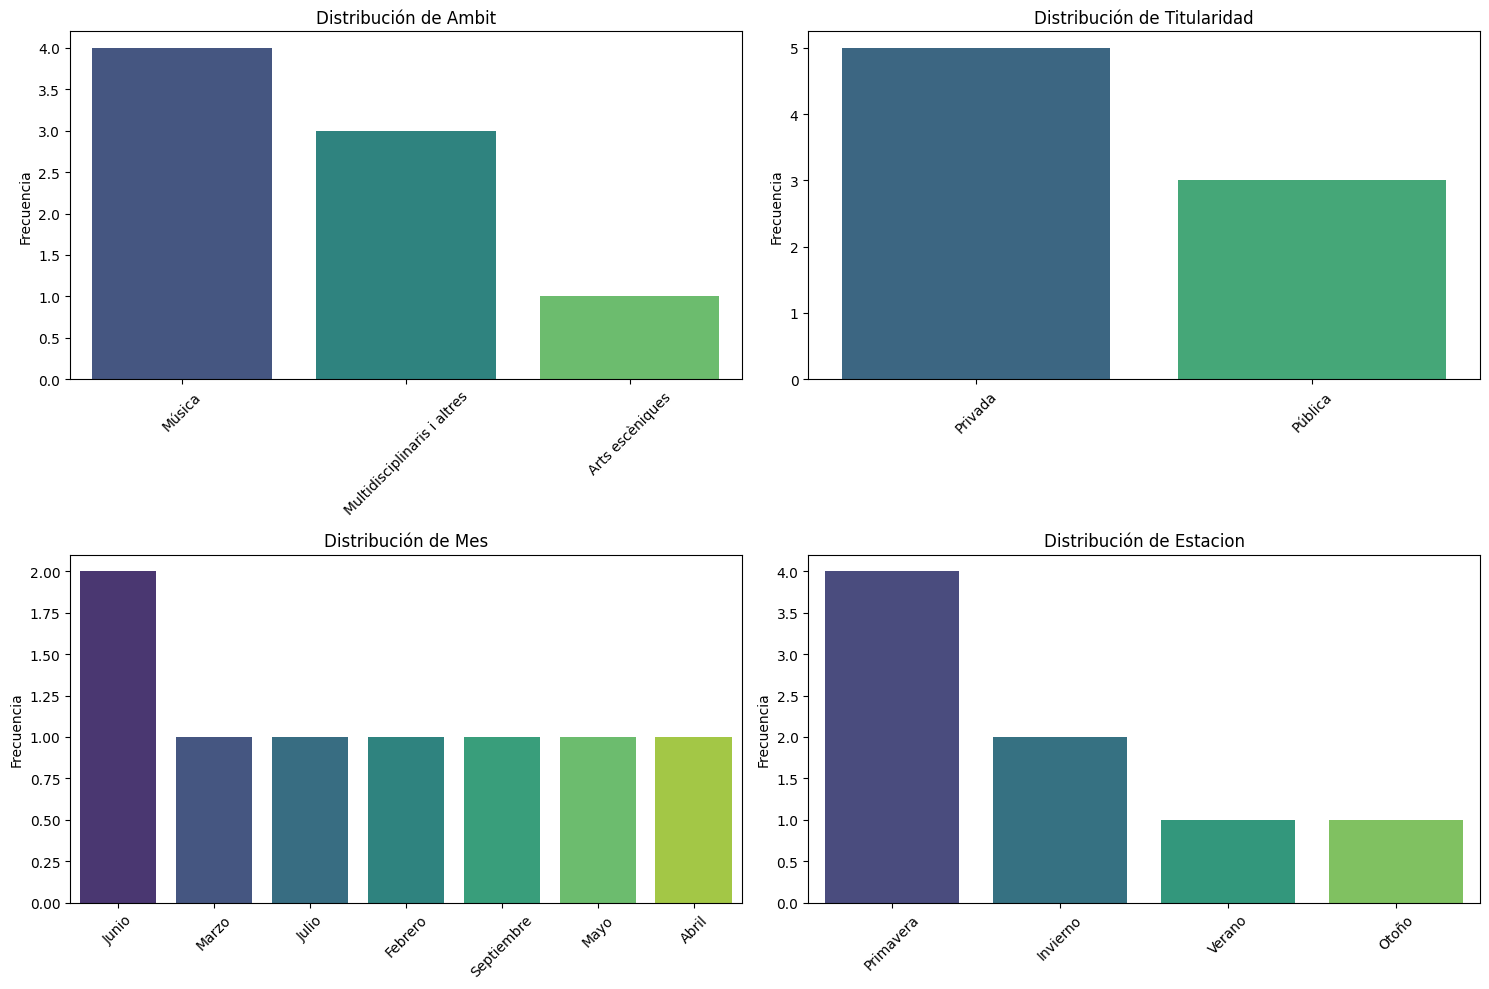

In [474]:
pinta_distribucion_categoricas(festivales_bcn_18, categoricas_destacadas)

Como hemos visto ya en otros casos, la música sigue siendo el segmento artístico con mayor representación en el mundo de los festivales, y responde a una mayor oferta del sector privado, que es el que luego se frena de forma súbita y empieza a recuperarse recién en la última muestra del 22.<br>
Y junio y la primavera suelen tener siempre, como en los demás años, una posición destacada en cuanto a los momentos del año con mayor oferta cultural en lo que agrandes festivales se refiere.